# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
max_cities = int(input("Enter the maximum number of cities you want to generate, keep in mind the more cities you generate the longer it will take: "))
if max_cities <= 0:
    print("Invalid input. Please enter a positive integer.")
else:
    print("Generating cities...")
    lat_lngs = []

    # Empty list for holding the latitude and longitude combinations
    lat_lngs = []

    # Empty list for holding the cities names
    cities = []

    # Range of latitudes and longitudes
    lat_range = (-90, 90)
    lng_range = (-180, 180)

    # Create a set of random lat and lng combinations
    lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
    lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    counter = 0
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            if counter < max_cities:
                cities.append(city)
                counter += 1
    # Print the city count to confirm sufficient count
    print(f"Number of cities in the list: {len(cities)}")

Generating cities...
Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:


# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    def debug():
        # Run an API request for each of the cities
        try:
            # Parse the JSON and retrieve data
            city_weather = requests.get(city_url).json()
            city_weather_json = json.dumps(city_weather, indent=4)

            # Print the beautified JSON
            print(city_weather_json)
            print('here')

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city,
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
        # If an error is experienced, skip the city
        except:
            print("City not found. Skipping...")
            pass
    debug()

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
{
    "coord": {
        "lon": 55.7679,
        "lat": -21.3585
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 292.92,
        "feels_like": 292.96,
        "temp_min": 290.43,
        "temp_max": 292.92,
        "pressure": 1022,
        "humidity": 77,
        "sea_level": 1022,
        "grnd_level": 1016
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.33,
        "deg": 223,
        "gust": 4.73
    },
    "clouds": {
        "all": 66
    },
    "dt": 1722559628,
    "sys": {
        "type": 1,
        "id": 2127,
        "country": "RE",
        "sunrise": 1722566881,
        "sunset": 1722607094
    },
    "timezone": 14400,
    "id": 935215,
    "name": "Saint-Philippe",
    "cod

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-philippe,-21.3585,55.7679,292.92,77,66,4.33,RE,1722559628
1,port alfred,-33.5906,26.8910,285.47,91,100,0.89,ZA,1722559650
2,tanjung selor,2.8372,117.3642,299.70,93,85,0.20,ID,1722559673
3,port-aux-francais,-49.3500,70.2167,278.05,94,100,16.46,TF,1722559695
4,alotau,-10.3069,150.4462,296.62,94,100,2.41,PG,1722559717


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-philippe,-21.3585,55.7679,292.92,77,66,4.33,RE,1722559628
1,port alfred,-33.5906,26.8910,285.47,91,100,0.89,ZA,1722559650
2,tanjung selor,2.8372,117.3642,299.70,93,85,0.20,ID,1722559673
3,port-aux-francais,-49.3500,70.2167,278.05,94,100,16.46,TF,1722559695
4,alotau,-10.3069,150.4462,296.62,94,100,2.41,PG,1722559717


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

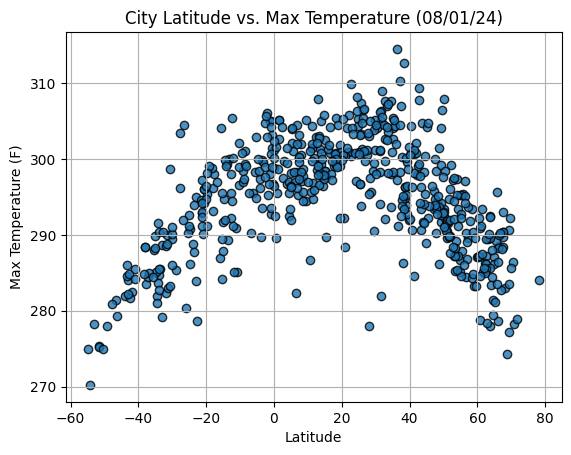

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

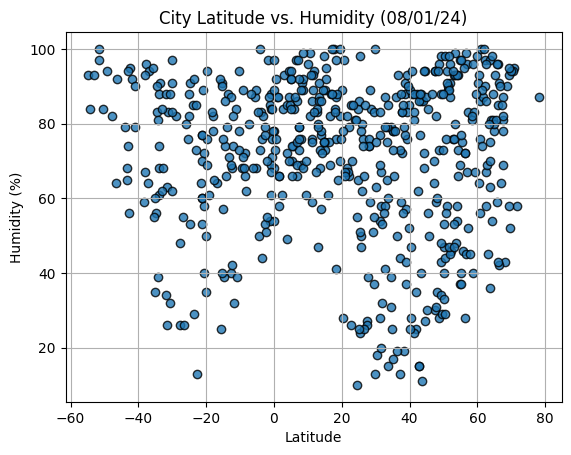

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

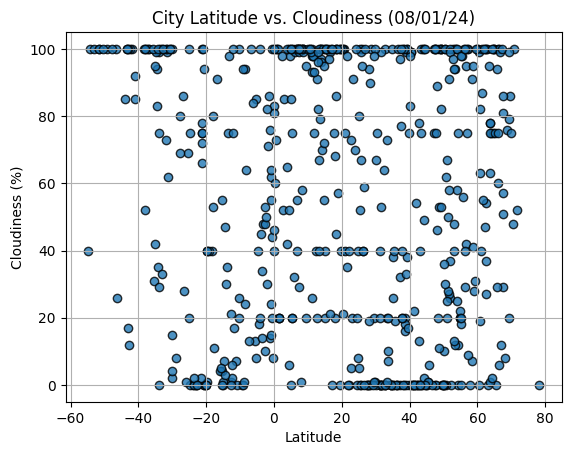

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

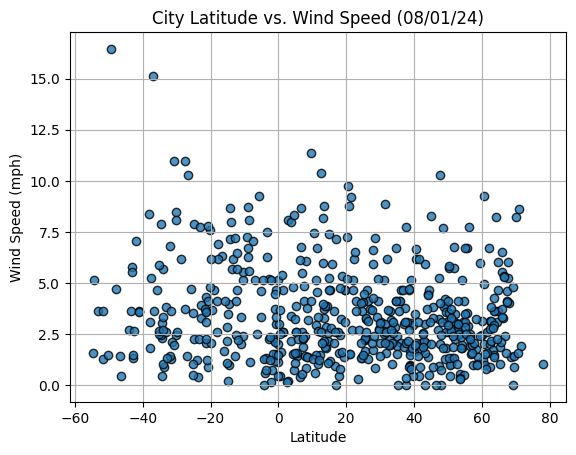

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.grid(True)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tanjung selor,2.8372,117.3642,299.70,93,85,0.20,ID,1722559673
5,kerman,30.2832,57.0788,304.07,18,75,3.09,IR,1722559740
7,bamboo flat,11.7000,92.7167,300.20,94,75,1.03,IN,1722559785
8,praia da vitoria,38.7333,-27.0667,296.35,88,20,0.99,PT,1722559807
10,mogocha,53.7333,119.7667,289.20,48,100,0.54,RU,1722559852


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-philippe,-21.3585,55.7679,292.92,77,66,4.33,RE,1722559628
1,port alfred,-33.5906,26.8910,285.47,91,100,0.89,ZA,1722559650
3,port-aux-francais,-49.3500,70.2167,278.05,94,100,16.46,TF,1722559695
4,alotau,-10.3069,150.4462,296.62,94,100,2.41,PG,1722559717
6,phalaborwa,-23.9430,31.1411,288.75,85,0,1.20,ZA,1722559762


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.6032042736143343


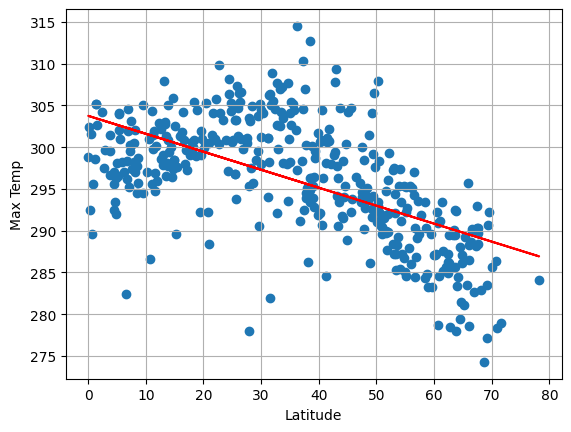

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-squared is: 0.8074348387742868


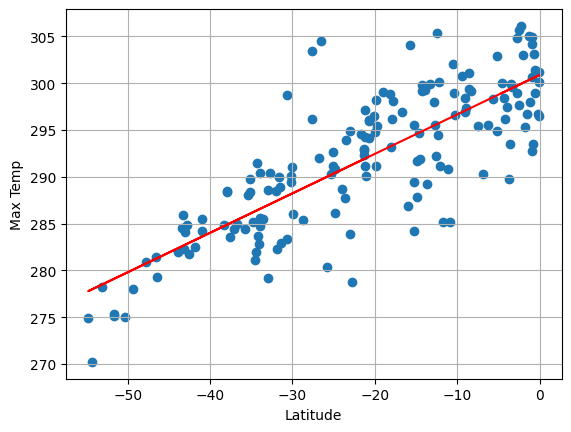

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-55,90))

**Discussion about the linear relationship:** Temperature is higher at latitud 0 or nearing the equator


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.05890948030816857


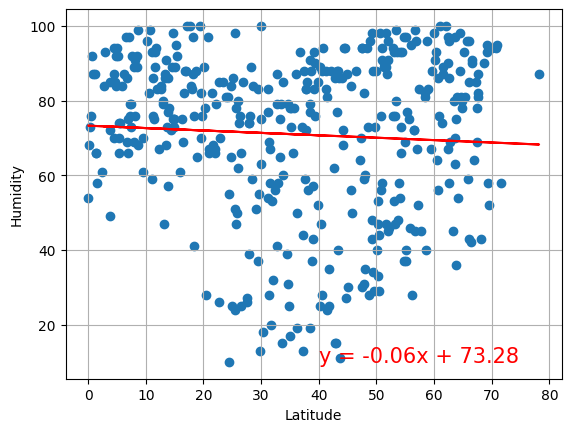

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))


The r-squared is: -0.08972051261549192


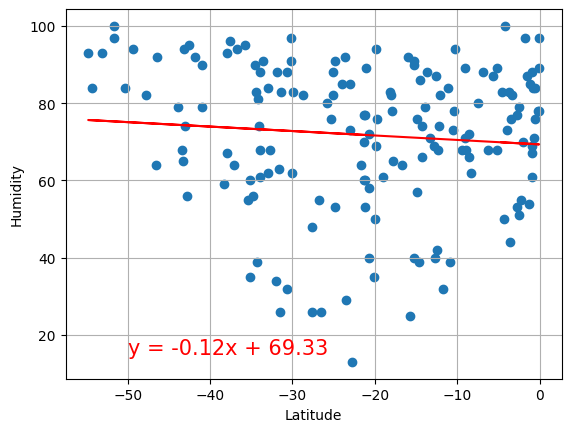

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-50,15))


**Discussion about the linear relationship:** Humidity is not necesarily affected by latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.13083532758249458


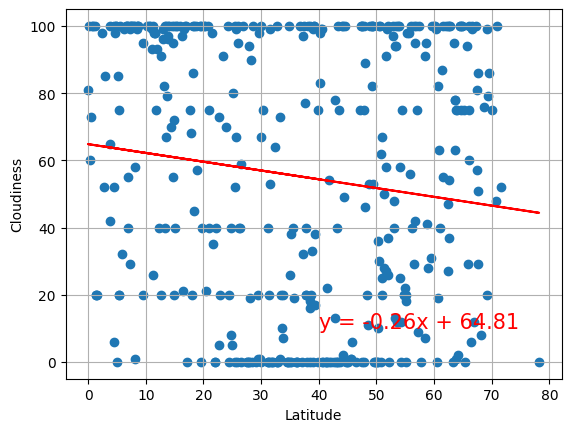

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(40,10))

The r-squared is: -0.3750194712325763


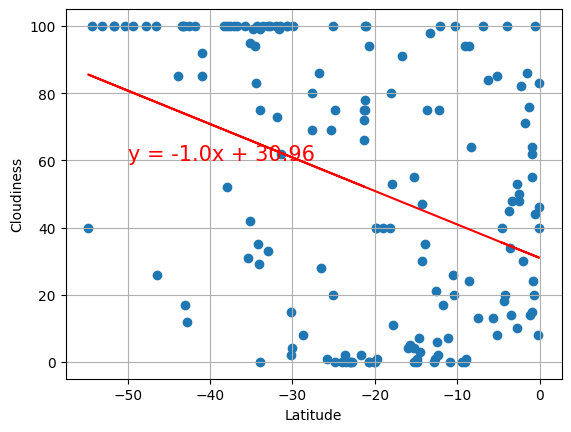

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(-50,60))


**Discussion about the linear relationship:** It is more clouded the further you go towards the poles

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.06749770763155225


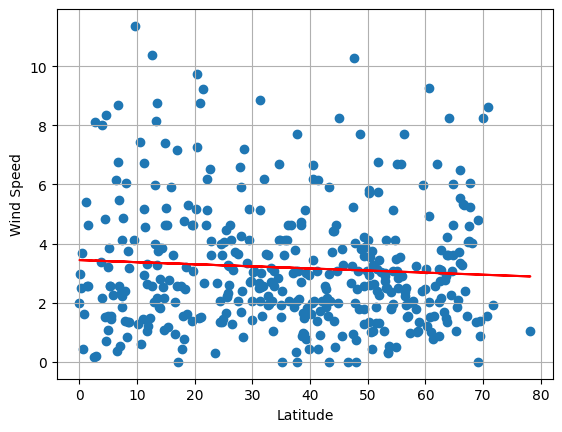

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(40,25))


The r-squared is: -0.07620127804518421


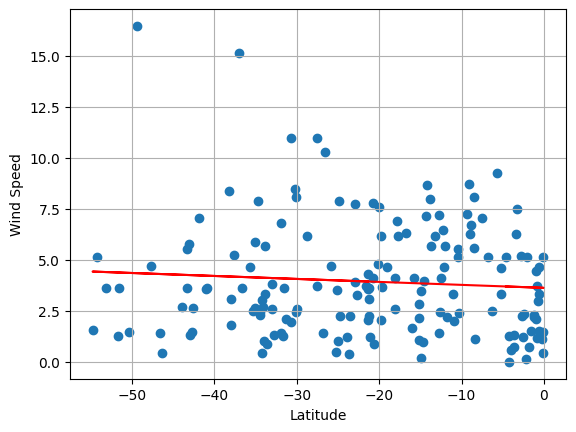

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-50,20))


**Discussion about the linear relationship:** Windspeed increases as you move towards the poles too